In [1]:
import pandas as pd
import numpy as np

from scipy import stats

In [3]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from analysis_utils import (collect_flanked_sequences, 
                            reorder_by_hamming_dist, 
                            prepare_nt_count_table, 
                            plot_seq_matrix,
                            plot_logo_from_counts)

2024-02-21 12:06:56.668677: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-21 12:06:56.668747: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-21 12:06:56.669734: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-21 12:06:56.676547: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-21 12:06:57.509468: W tensorflow/compiler/tf2

In [4]:
tsv_path = "/home1/smaruj/akitaX1-analyses/experiments/virtual_insertion_flank_core_compatibility/input_data/CTCFs_jaspar_filtered_mm10_sampled_high_medium_lowbg_0.tsv"

In [5]:
df = pd.read_csv(tsv_path, sep="\t")

In [6]:
df_flanks = df[["chrom_flank", "end_flank", "start_flank", "strand_flank", "insertion_SCD_flank"]].drop_duplicates()

In [7]:
df_flanks = df_flanks.sort_values(by="insertion_SCD_flank", ascending=False)

In [8]:
df_flanks = df_flanks.reset_index(drop=True)

In [9]:
df_flanks = df_flanks.rename(columns={"chrom_flank": "chrom", 
                          "end_flank": "end",
                         "start_flank": "start",
                         "strand_flank": "strand"})

In [10]:
data = np.load("core_and_flank_averages.npz")

In [11]:
df_flanks["flanks_average"] = data["flanks_averages"]

In [12]:
# num of sites the further analysis is based on
num_sites = 100
sites = df_flanks.sort_values(by=["flanks_average"], ascending=False)[:num_sites].reset_index(drop=True)

## Visualizing Sequences as Matrix

In [13]:
dna_matrix = collect_flanked_sequences(sites)

/home1/smaruj/akitaX1-analyses/utils/analysis_utils.py:94: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  scipy.cluster.hierarchy.linkage(seq_dist)


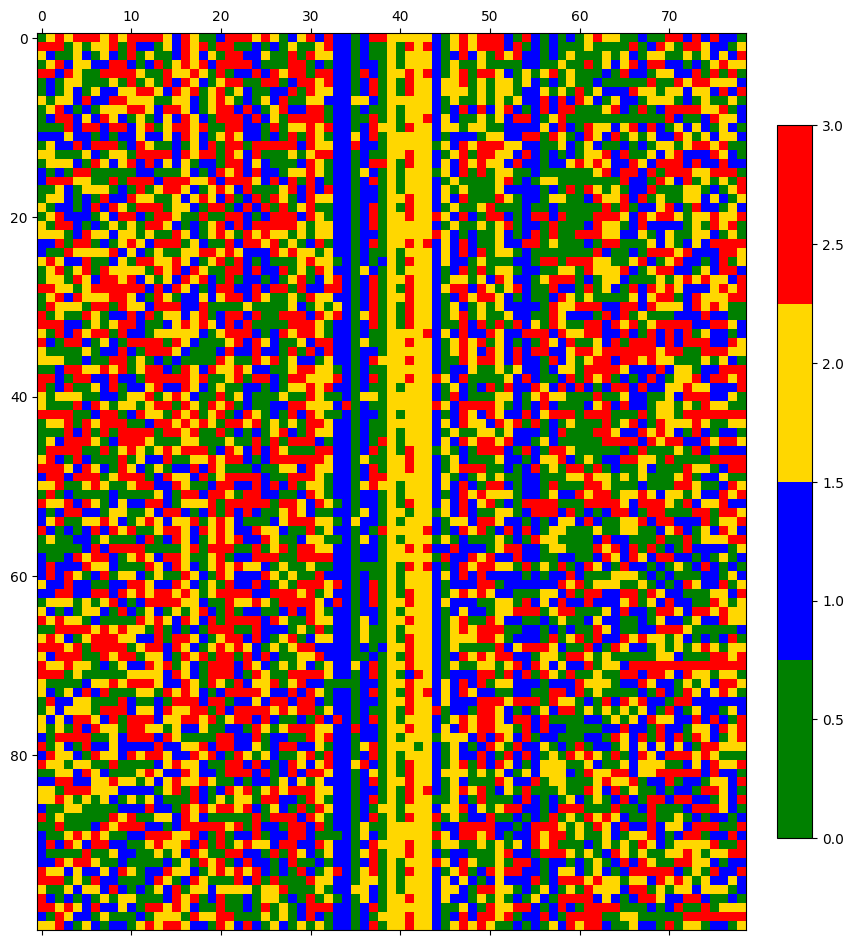

In [14]:
plot_seq_matrix(dna_matrix, cluster_by_hamming=True, sub_index=(0, -1)) # with hamming distance, entire sequence

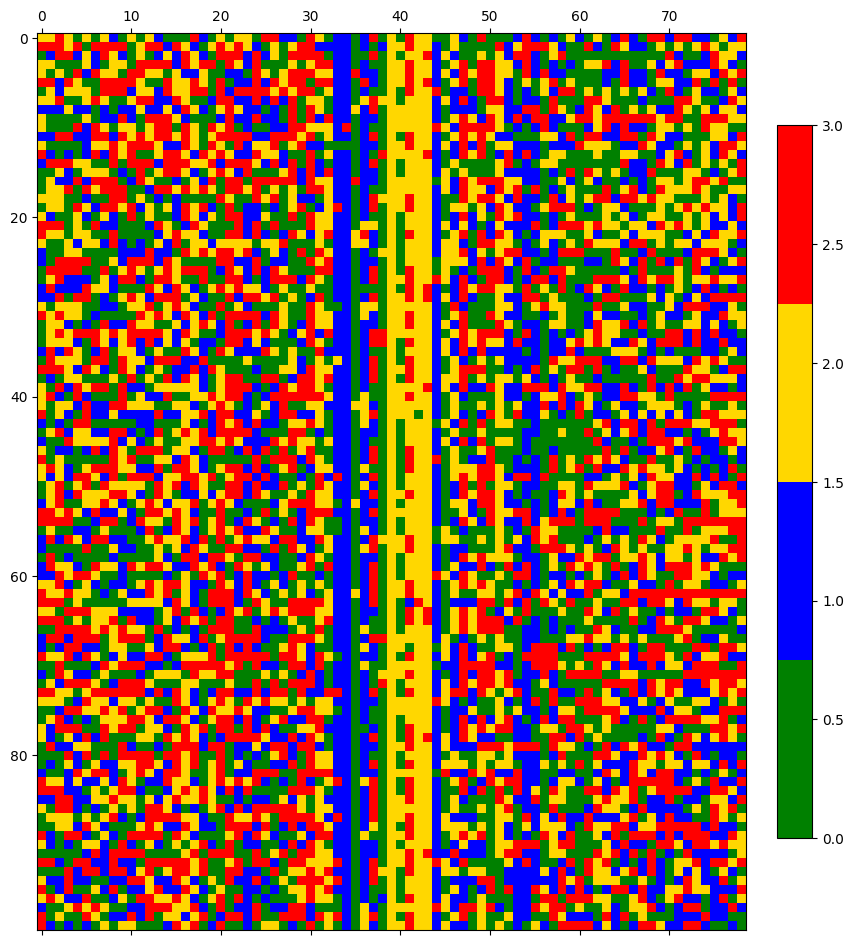

In [15]:
plot_seq_matrix(dna_matrix, cluster_by_hamming=True, sub_index=(-30, -1)) # with hamming distance, right flank

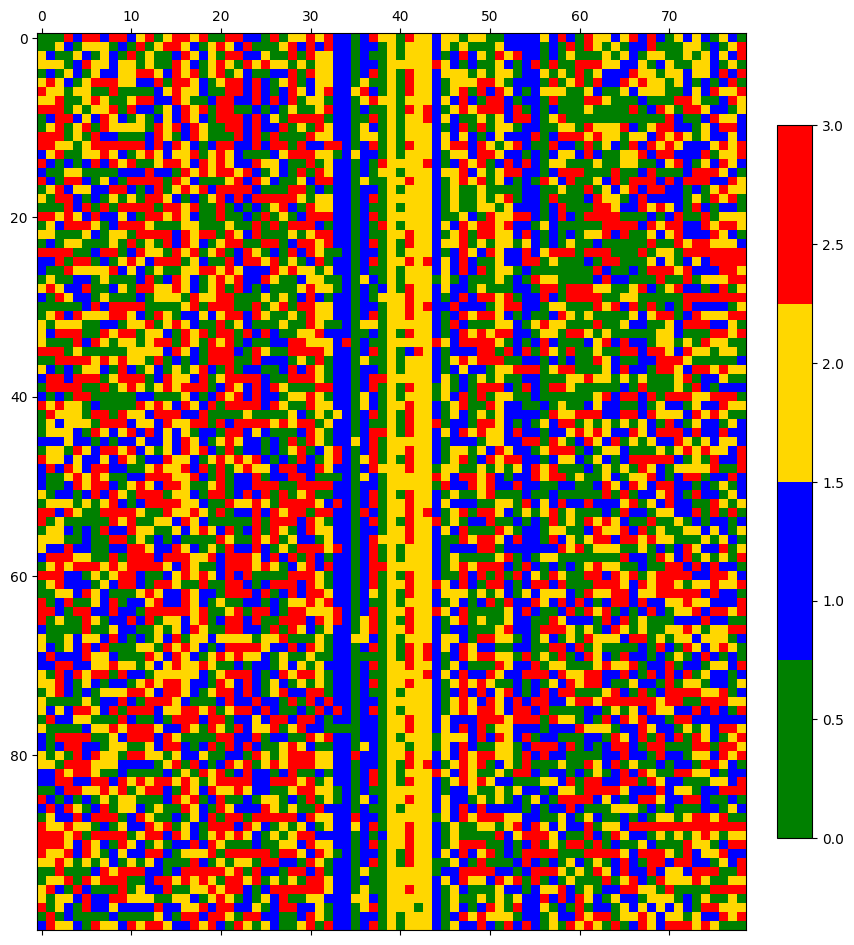

In [16]:
plot_seq_matrix(dna_matrix, cluster_by_hamming=False) # order of flank strength

## Creating Logo

In [17]:
nt_count_table = prepare_nt_count_table(sites)

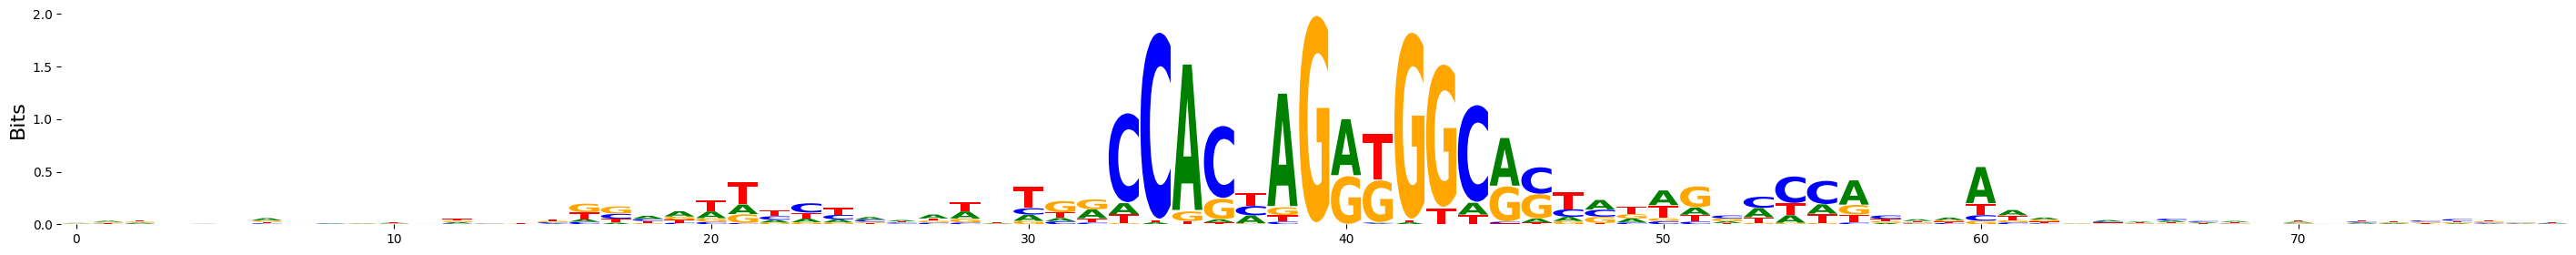

In [18]:
plot_logo_from_counts(nt_count_table)